In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img_name = './PW02/sponge-bob.jpg'

img = imageio.imread(img_name)
print(img.shape)
img_tinted = img * [0.8, 0.8, 0.8]

plt.figure(figsize=(10, 10))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)
# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))

plt.show()

ImportError: No module named 'imageio'

PW 02 : Exercice 1 Numpy tutorial
=================

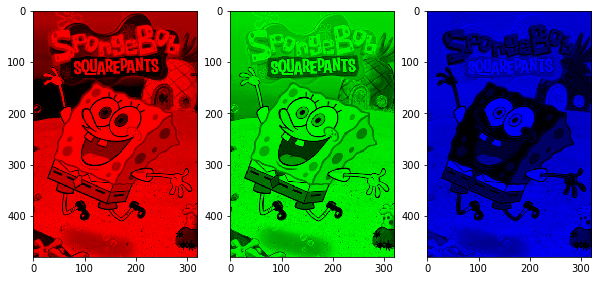

In [12]:
#######################################################################
# TODO:                                                               #
# Show the red, green and blue components of the image in 3 different #
# sub-plots                                                           #
#######################################################################
# If we have a look at the array in "img" we can see that it has 3 different
# values per index. These are the values for red, green and blue. 
# To display each channel seperatly we need to take only the value at a specific index, or set all others to 0.

img = imageio.imread(img_name)
img_red = img * [1.0, 0.0, 0.0]
img_green = img * [0.0, 1.0, 0.0]
img_blue = img * [0.0, 0.0, 1.0]

plt.figure(figsize=(10, 10))

# Show the red channel
plt.subplot(1, 3, 1)
plt.imshow(np.uint8(img_red))

# Show the green channel
plt.subplot(1, 3, 2)
plt.imshow(np.uint8(img_green))

# Show the blue channel
plt.subplot(1, 3, 3)
plt.imshow(np.uint8(img_blue))

plt.show()

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

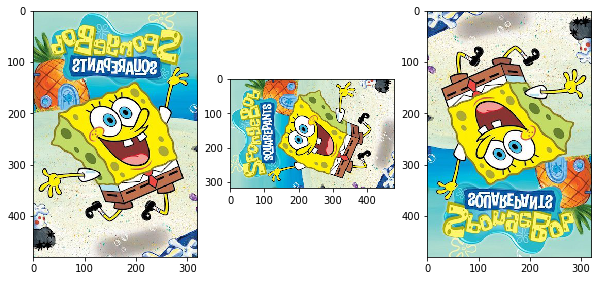

In [13]:
#######################################################################
# TODO:                                                               #
# Perform the following distorsion of the image and display it        #
#  - vertical flip                                                    #
#  - rotation 90 degrees                                              #
#  - horizontal flip
# Hint: have a look at the np.fliplr() function                       #
#######################################################################



img = imageio.imread(img_name)
# Vertical Flip ("mirroring")
img_flipped_lr = np.fliplr(img)
# rotation 90 degrees
img_rot90 = np.rot90(img)
# horizontal flip
img_flipped_ud = np.flipud(img)

plt.figure(figsize=(10, 10))

# Show the flipped lr image
plt.subplot(1, 3, 1)
plt.imshow(np.uint8(img_flipped_lr))

# Show the rotated image
plt.subplot(1, 3, 2)
plt.imshow(np.uint8(img_rot90))

# Show the flipped ud image
plt.subplot(1, 3, 3)
plt.imshow(np.uint8(img_flipped_ud))

plt.show()


#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

PW 02 : Exercice 2 Classification system with KNN - Student dataset
=================

#### a. Getting started

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and x2. The last column holds the class label y.

In [18]:
import pandas as pd

dataset = pd.read_csv('./PW02/ex2-student-dataset/ex1-data-train.csv',names=['x1','x2','y'])
dataset.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


b) Plot the training data using a scatter plot. You should get something similar to what is displayed in Figure 1.

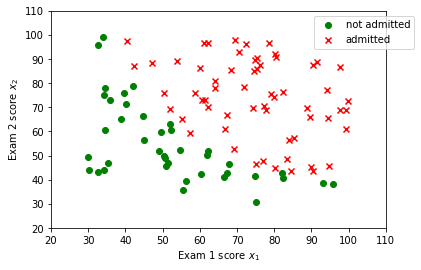

In [33]:
x1 = dataset['x1'].values
x2 = dataset['x2'].values
y = dataset['y'].values

x1_0 = []
x1_1 = []
x2_0 = []
x2_1 = []

for i in np.arange(len(x1)):
    if y[i] == 0:
        x1_0.append(x1[i])
        x2_0.append(x2[i])
    else:
        x1_1.append(x1[i])
        x2_1.append(x2[i])

plt.scatter(x1_0,x2_0,marker='o',color='green',label='not admitted')
plt.scatter(x1_1,x2_1,marker='x',color='red',label='admitted')
plt.xlabel('Exam 1 score $x_1$')
plt.ylabel('Exam 2 score $x_2$')
plt.legend(bbox_to_anchor=(1.1, 1))
axes = plt.gca()
axes.set_xlim([20,110])
axes.set_ylim([20,110])
plt.show()

test = (50,50)



c) Build a dummy recognition system that takes decisions randomly.

In [34]:
import random

def dummy_decisions():
    rnd = random.uniform(0, 1)
    if rnd > 0.5:
        return 1
    else:
        return 0

d) Compute the performance Ncorrect/N of this system on the test set ex1-data-test.csv, with N the number of test samples and Ncorrect the number of correct decision in com- parison to the ground truth.

In [35]:
N = len(y)
def performance_dummy(y):
    N_correct = 0

    for i in y:
        dec = dummy_decisions()
        if dec == i:
            N_correct += 1
    return N_correct

print(performance_dummy(y))

49


#### b. KNN classifier

In [ ]:
def euclidianDistance(point_A,point_B):
    #return np.sqrt(np.sum(np.power((a-b),2.0)))
    return np.sqrt(sum([(a - b) ** 2 for a, b in zip(point_A, point_B)]))


#euclidian distance between all the point from a and the unique point b
def euclidianDistanceVec(X_train,X_test):
    euclidianDistanceList = []
    [euclidianDistanceList.append(euclidianDistance(i,X_test)) for i in X_train]
    return euclidianDistanceList
    
def knn(X_train, X_test, y, k):
    y_pred = []
    #calculate the distance from 1 point of test to all points of train
    for i in X_test:
        dist_X_test = euclidianDistanceVec(X_train, i)
        #get the k smallest distances
        kNNs = nsmallest(k, dist_X_test)
        #for each NN get the index class of the point
        classification_vec = []
        index_of_kNN = []
        for dist in kNNs:
            index_of_kNN.append(dist_X_test.index(dist))
        for ind in index_of_kNN: 
            classification_vec.append(y[ind])
            #Now we got the classes for each kNN we need to make a decision
        if len(classification_vec) % 2 == 0 and classification_vec.count(0) == classification_vec.count(1):
            sum_0 = 0
            sum_1 = 0
            for a in range(len(classification_vec)):
                if classification_vec[a] == 0:
                    sum_0 += dist_X_test[index_of_kNN[a]]
                else:
                    sum_1 += dist_X_test[index_of_kNN[a]]
            if sum_0 < sum_1:
                y_pred.append(0)
            else:
                y_pred.append(1)
        else:
            counts = np.bincount(np.array(classification_vec))
            y_pred.append(np.argmax(counts))
    return y_pred

Compute the performance of the system as a function of k = 1 . . . 7. What value of k gives you the best performances ?

In [38]:
from heapq import nsmallest

# prepare the points

X_train = list(zip(x1,x2))

#load test set

dataset_test = pd.read_csv('./PW02/ex2-student-dataset/ex1-data-test.csv',names=['x1','x2','y'])

x1_test = dataset_test['x1'].values
x2_test = dataset_test['x2'].values
y_test = dataset_test['y'].values

X_test = list(zip(x1_test,x2_test))

for k in range(1,8):
    ypred = knn(X_train, X_test, y, k)
    counter = 0
    for i in range(len(y)):
        if y_test[i] == ypred[i]:
            counter += 1
    print(counter/N)

0.96
0.96
0.97
0.96
0.92
0.95
0.91


Comment your result.

My implemenation takes, if k is even, the total sum of distances of NNs and takes the class with the smaller sum. (There are many other possible solution)